In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.drop(columns=['description'], inplace=True)
df['director'].fillna('Unavailable', inplace=True)
df['cast'].fillna('Unavailable', inplace=True)
df['country'].fillna('Unavailable', inplace=True)
df.dropna(subset=['date_added', 'rating', 'duration'],inplace=True)
df.drop(columns=['show_id'], inplace=True)
df.rename(columns={'listed_in': 'genre'}, inplace=True)
df['director'] = df.director.str.split(', ')
df['cast'] = df.cast.str.split(', ')
df['country'] = df.country.str.split(', ')
df['genre'] = df.genre.str.split(', ')
df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True).dt.to_period('M')
df.sort_values('date_added', ignore_index=True, inplace=True)

In [5]:
movies_df = df[df['type']=='Movie'].copy()
shows_df = df[df['type']=='TV Show'].copy()

In [6]:
movies_df.reset_index(drop=True, inplace=True)
shows_df.reset_index(drop=True, inplace=True)
movies_df.drop(columns=['type'], inplace=True)
shows_df.drop(columns=['type'], inplace=True)
movies_df.duration = movies_df.duration.str.replace(' min','').astype(int)
shows_df.rename(columns={'duration':'seasons'}, inplace=True)
shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
shows_df.seasons = shows_df.seasons.str.replace(' Seasons','').astype(int)

In [7]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,Movie,To and From New York,[Sorin Dan Mihalcescu],"[Barbara King, Shaana Diya, John Krisiukenas, ...",[United States],2008-01,2006,TV-MA,81 min,"[Dramas, Independent Movies, Thrillers]"
1,TV Show,Dinner for Five,[Unavailable],[Unavailable],[United States],2008-02,2007,TV-MA,1 Season,[Stand-Up Comedy & Talk Shows]
2,Movie,Just Another Love Story,[Ole Bornedal],"[Anders W. Berthelsen, Rebecka Hemse, Nikolaj ...",[Denmark],2009-05,2007,TV-MA,104 min,"[Dramas, International Movies]"
3,Movie,Splatter,[Joe Dante],"[Corey Feldman, Tony Todd, Tara Leigh, Erin Wa...",[United States],2009-11,2009,TV-MA,29 min,[Horror Movies]
4,Movie,Mad Ron's Prevues from Hell,[Jim Monaco],"[Nick Pawlow, Jordu Schell, Jay Kushwara, Mich...",[United States],2010-11,1987,NR,84 min,"[Cult Movies, Horror Movies]"


In [8]:
movies_df.head()

,title,director,cast,country,date_added,release_year,rating,duration,genre
0,To and From New York,[Sorin Dan Mihalcescu],"[Barbara King, Shaana Diya, John Krisiukenas, ...",[United States],2008-01,2006,TV-MA,81,"[Dramas, Independent Movies, Thrillers]"
1,Just Another Love Story,[Ole Bornedal],"[Anders W. Berthelsen, Rebecka Hemse, Nikolaj ...",[Denmark],2009-05,2007,TV-MA,104,"[Dramas, International Movies]"
2,Splatter,[Joe Dante],"[Corey Feldman, Tony Todd, Tara Leigh, Erin Wa...",[United States],2009-11,2009,TV-MA,29,[Horror Movies]
3,Mad Ron's Prevues from Hell,[Jim Monaco],"[Nick Pawlow, Jordu Schell, Jay Kushwara, Mich...",[United States],2010-11,1987,NR,84,"[Cult Movies, Horror Movies]"
4,Even the Rain,[Icíar Bollaín],"[Luis Tosar, Gael García Bernal, Juan Carlos A...","[Spain, Mexico, France]",2011-05,2010,TV-MA,103,"[Dramas, International Movies]"


In [9]:
shows_df.head()

,title,director,cast,country,date_added,release_year,rating,seasons,genre
0,Dinner for Five,[Unavailable],[Unavailable],[United States],2008-02,2007,TV-MA,1,[Stand-Up Comedy & Talk Shows]
1,Jack Taylor,[Stuart Orme],"[Iain Glen, Killian Scott, Nora-Jane Noone, Ta...","[United States, Ireland]",2013-03,2016,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Dr..."
2,Breaking Bad,[Unavailable],"[Bryan Cranston, Aaron Paul, Anna Gunn, Dean N...",[United States],2013-08,2013,TV-MA,5,"[Crime TV Shows, TV Dramas, TV Thrillers]"
3,The 4400,[Unavailable],"[Joel Gretsch, Jacqueline McKenzie, Patrick Jo...","[United States, United Kingdom]",2013-09,2007,TV-14,4,"[TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy]"
4,Russell Peters vs. the World,[Unavailable],[Russell Peters],[United States],2013-10,2013,NR,1,"[Docuseries, Stand-Up Comedy & Talk Shows]"


In [10]:
from collections import Counter

movie_countries = list(filter(lambda x: x != 'Unavailable', sum(movies_df.country, [])))
show_countries = list(filter(lambda x: x != 'Unavailable', sum(shows_df.country, [])))
movie_genres = list(filter(lambda x: x != 'International Movies', sum(movies_df.genre, [])))
show_genres = list(filter(lambda x: (x != 'International TV Shows') & (x != 'British TV Shows') 
                          & (x != 'Korean TV Shows') & (x != 'Spanish-Language TV Shows'), sum(shows_df.genre, [])))

most_common_movie_countries = Counter(movie_countries).most_common(15)
most_common_show_countries = Counter(show_countries).most_common(15)
most_common_movie_genres = Counter(movie_genres).most_common(15)
most_common_show_genres = Counter(show_genres).most_common(15)

most_common_movie_countries = [x[0] for x in most_common_movie_countries]
most_common_show_countries = [x[0] for x in most_common_show_countries]
most_common_movie_genres = [x[0] for x in most_common_movie_genres]
most_common_show_genres = [x[0] for x in most_common_show_genres]

most_common_movie_countries.append('Israel')
most_common_show_countries.append('Israel')

In [11]:
def unnest(df, col):
    import pandas as pd
    col_flat = pd.DataFrame([[i, x] 
                       for i, y in df[col].apply(list).iteritems() 
                           for x in y], columns=['I', col])
    col_flat = col_flat.set_index('I')
    df = df.drop(col, 1)
    df = df.merge(col_flat, left_index=True, right_index=True)
    df = df.reset_index(drop=True)
    return df

In [12]:
def plot_cumulative_count(df, column, values, title):
    data = unnest(df[['date_added', column]], column)
    fig, ax = plt.subplots(figsize=(25,8))
    for value in values:
        cumcount = data[data[column] == value].groupby(by=['date_added'], dropna=False).count().cumsum().loc['2015-01':]
        cumcount = cumcount.reindex(pd.period_range('2015-01', max(df.date_added)+1)).ffill()
        cumcount.plot(ax=ax, label=value)
    ax.legend(values)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total Count', fontsize=12)
    ax.set_title(title, fontsize=16)
    plt.show()

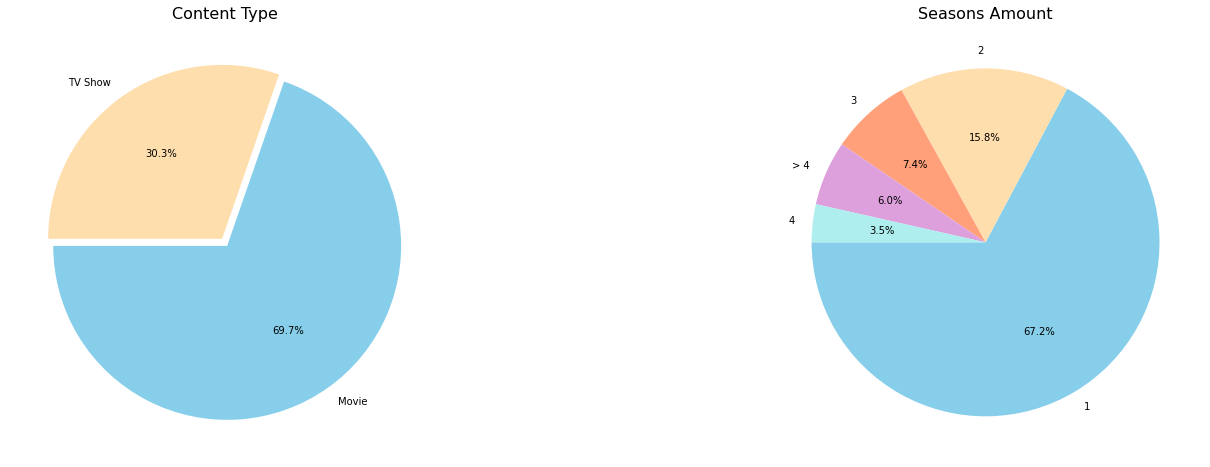

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(25,8))
colors = ['skyblue','navajowhite', 'lightsalmon', 'plum', 'paleturquoise', 'lemonchiffon']

axs[0].set_title('Content Type', fontsize=16)
axs[0].pie(df.type.value_counts(), explode=(0.025,0.025), labels=df.type.value_counts().index, colors=colors, autopct='%1.1f%%', startangle=180)

data = shows_df.copy()
data.loc[data.seasons > 4, 'seasons'] = '> 4'
axs[1].set_title('Seasons Amount', fontsize=16)
axs[1].pie(data.seasons.value_counts(), labels=data.seasons.value_counts().index, colors=colors, autopct='%1.1f%%', startangle=180)

plt.show()

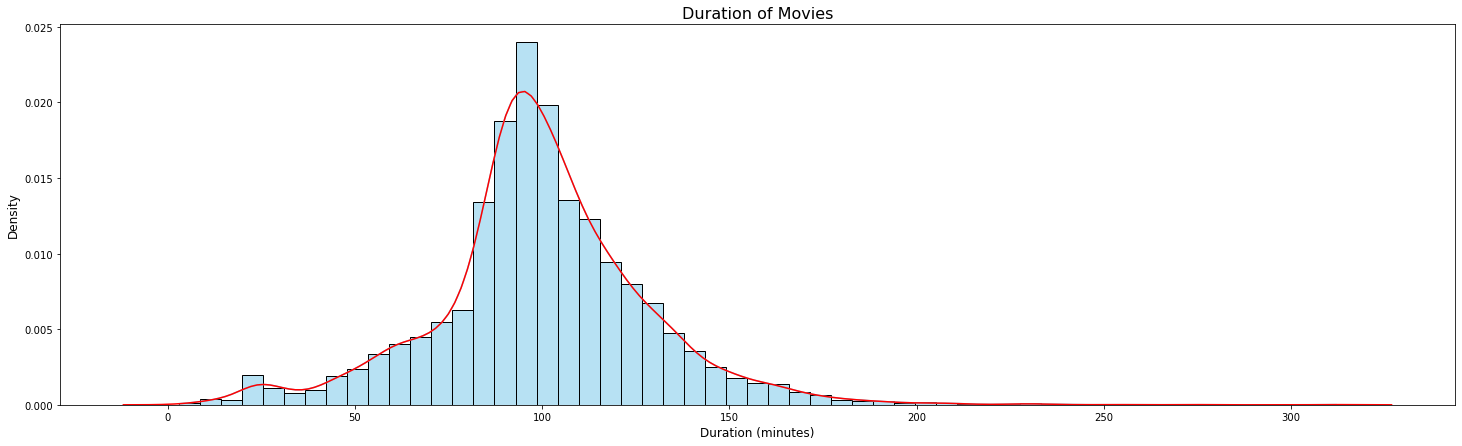

In [14]:
plt.figure(figsize=(25,7))
sns.histplot(movies_df.duration, bins=55, color='skyblue', stat='density',kde = True, alpha=0.6)
sns.kdeplot(movies_df.duration, color='red')

plt.title('Duration of Movies', fontsize=16)
plt.ylabel('Density', fontsize=12)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.show()

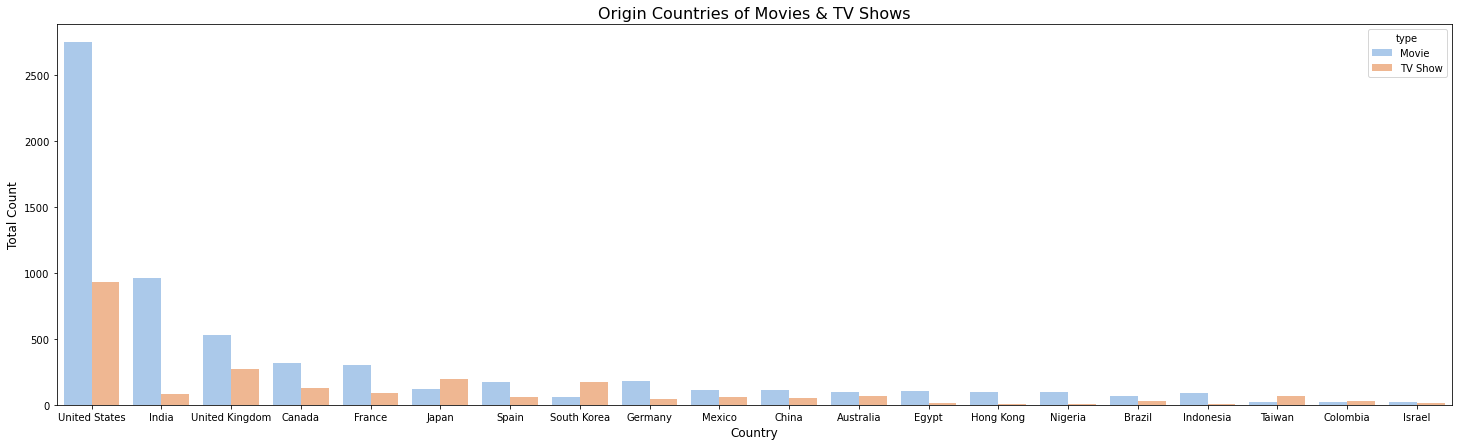

In [15]:
data = unnest(df, 'country')
boolean_series = data.country.isin(most_common_movie_countries + most_common_show_countries)
data = data[boolean_series]
plt.figure(figsize=(25,7))
sns.countplot(x=data.country, hue=data.type, order=data.country.value_counts().index, palette='pastel');
plt.title('Origin Countries of Movies & TV Shows', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.show()

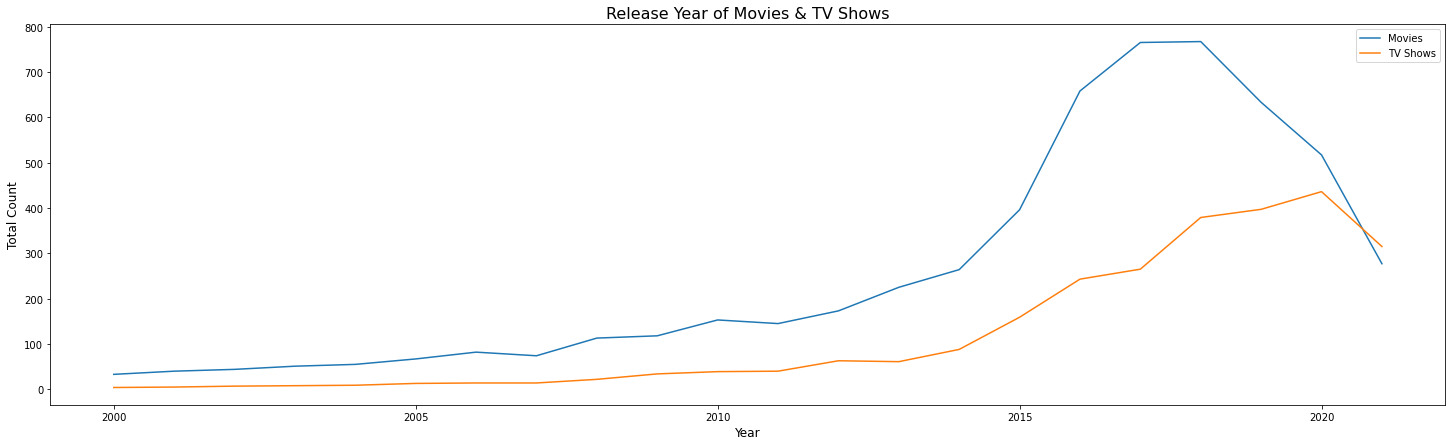

In [16]:
plt.figure(figsize=(25,7))
plt.plot(movies_df.release_year.value_counts().sort_index().loc[2000:], label='Movies')
plt.plot(shows_df.release_year.value_counts().sort_index().loc[2000:], label='TV Shows')
plt.title('Release Year of Movies & TV Shows', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.legend()
plt.show()

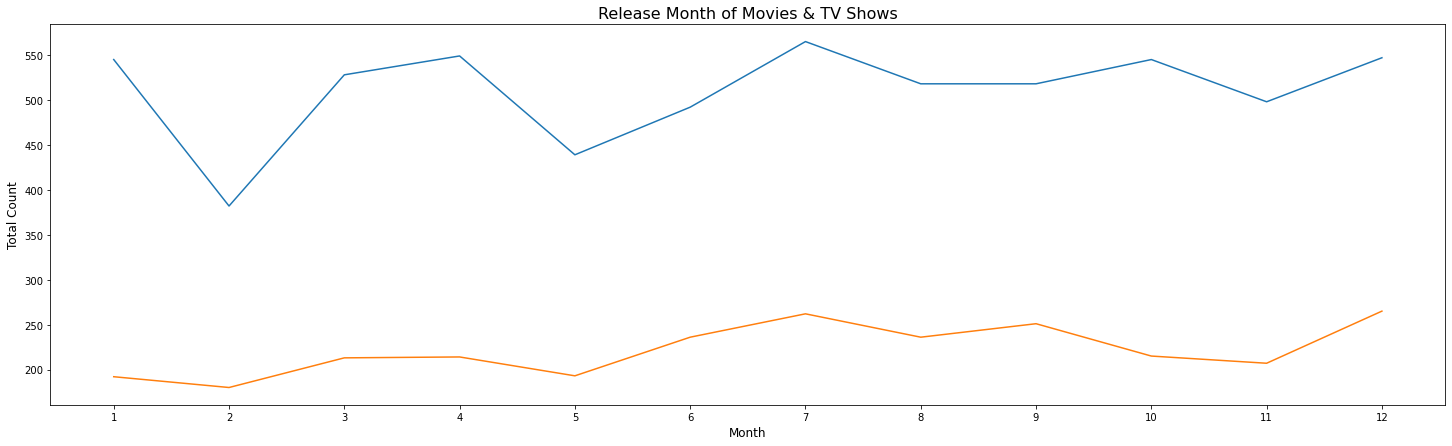

In [17]:
def month(x):
    return x.month

plt.figure(figsize=(25,7))
plt.plot(movies_df.date_added.apply(month).value_counts().sort_index(), label='Movies')
plt.plot(shows_df.date_added.apply(month).value_counts().sort_index(), label='TV Shows')
plt.title('Release Month of Movies & TV Shows', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(range(1,13))
plt.show()

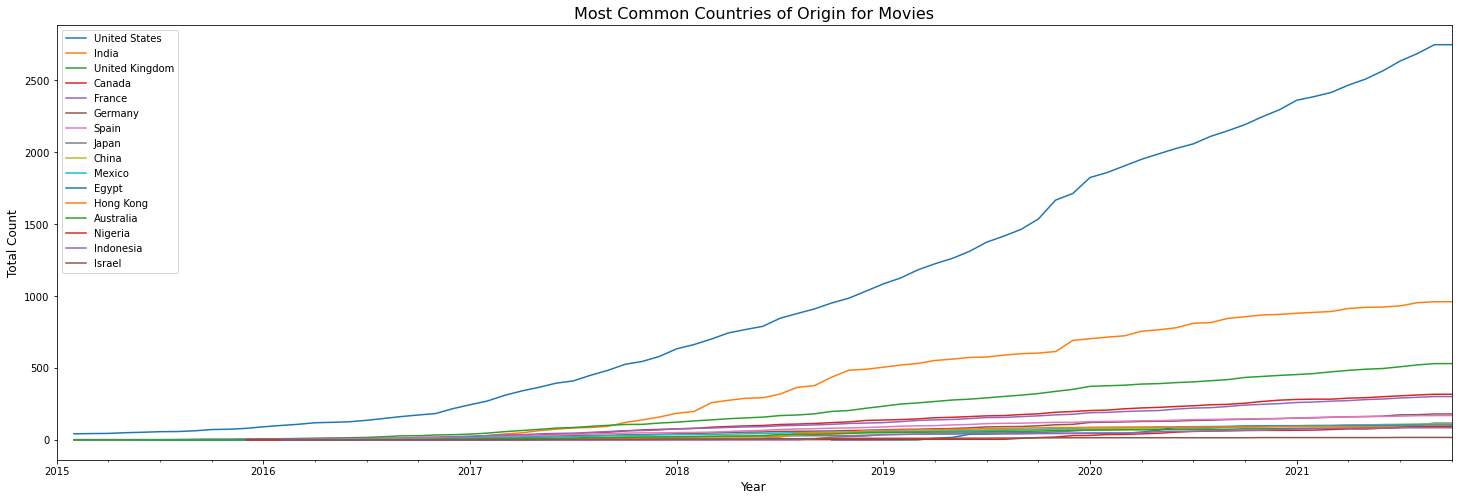

In [18]:
plot_cumulative_count(movies_df, 'country', most_common_movie_countries, 'Most Common Countries of Origin for Movies')

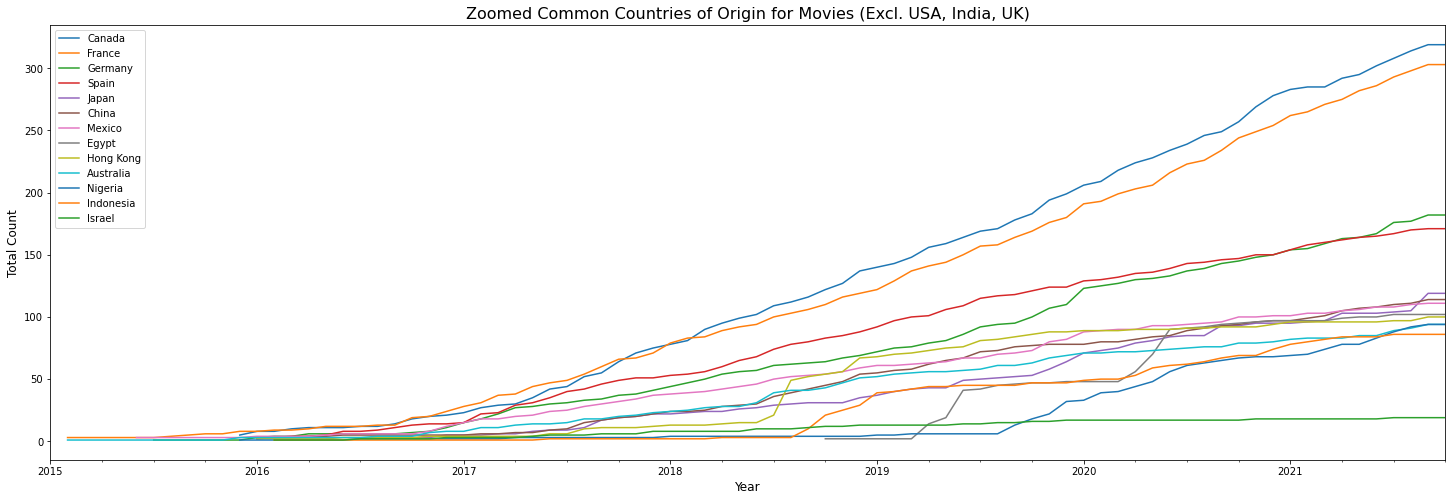

In [19]:
plot_cumulative_count(movies_df, 'country', most_common_movie_countries[3:], 'Zoomed Common Countries of Origin for Movies (Excl. USA, India, UK)')

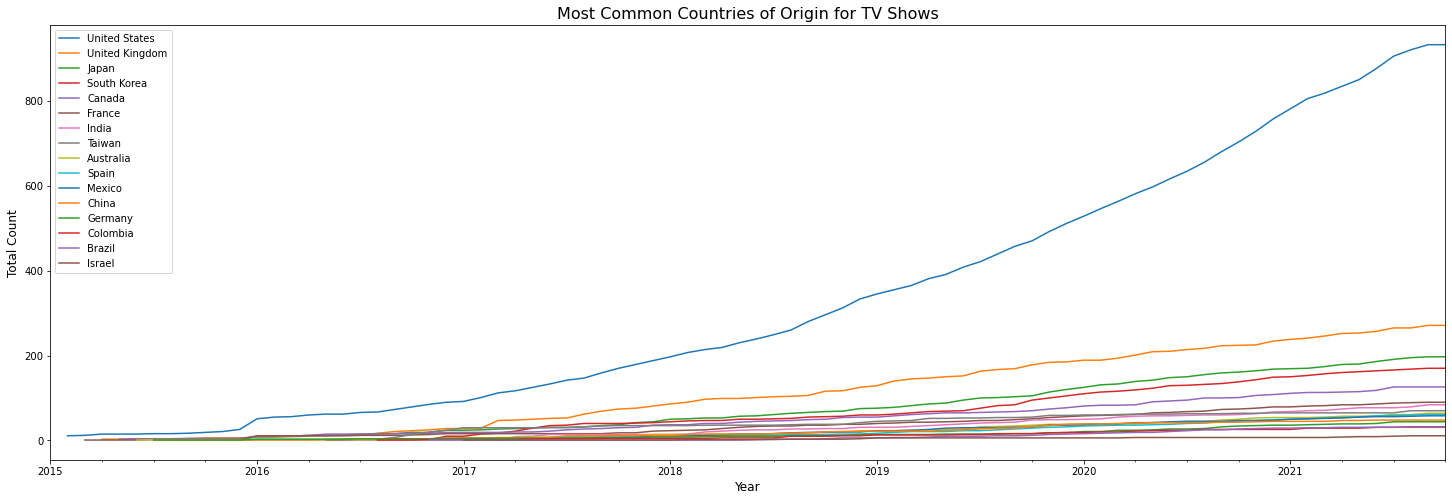

In [20]:
plot_cumulative_count(shows_df, 'country', most_common_show_countries, 'Most Common Countries of Origin for TV Shows')

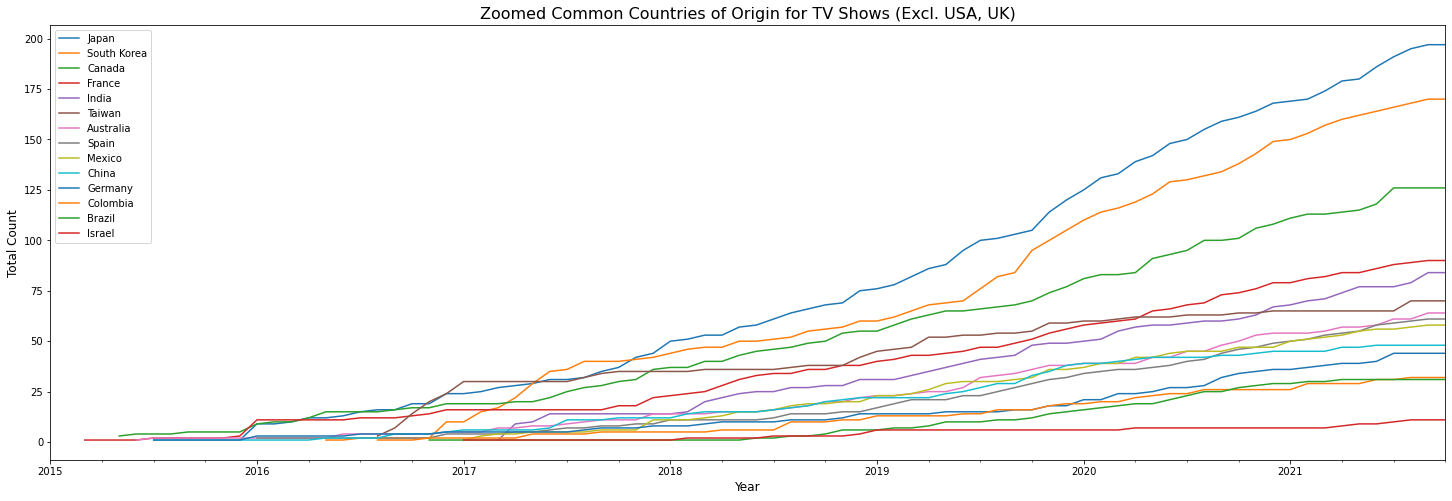

In [21]:
plot_cumulative_count(shows_df, 'country', most_common_show_countries[2:], 'Zoomed Common Countries of Origin for TV Shows (Excl. USA, UK)')

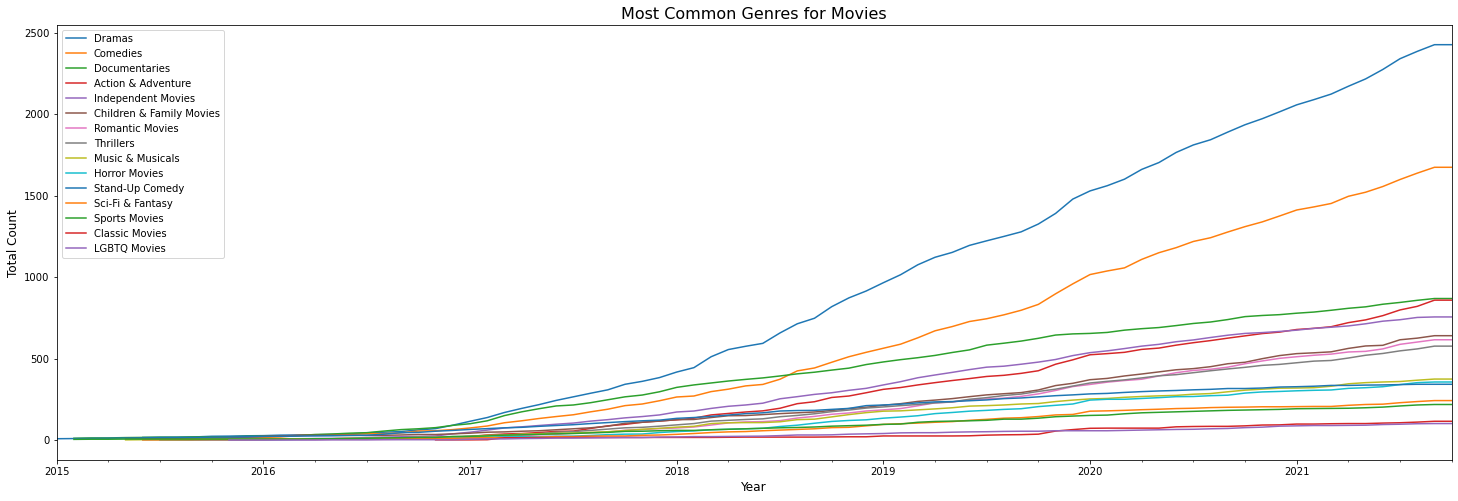

In [22]:
plot_cumulative_count(movies_df, 'genre', most_common_movie_genres, 'Most Common Genres for Movies')

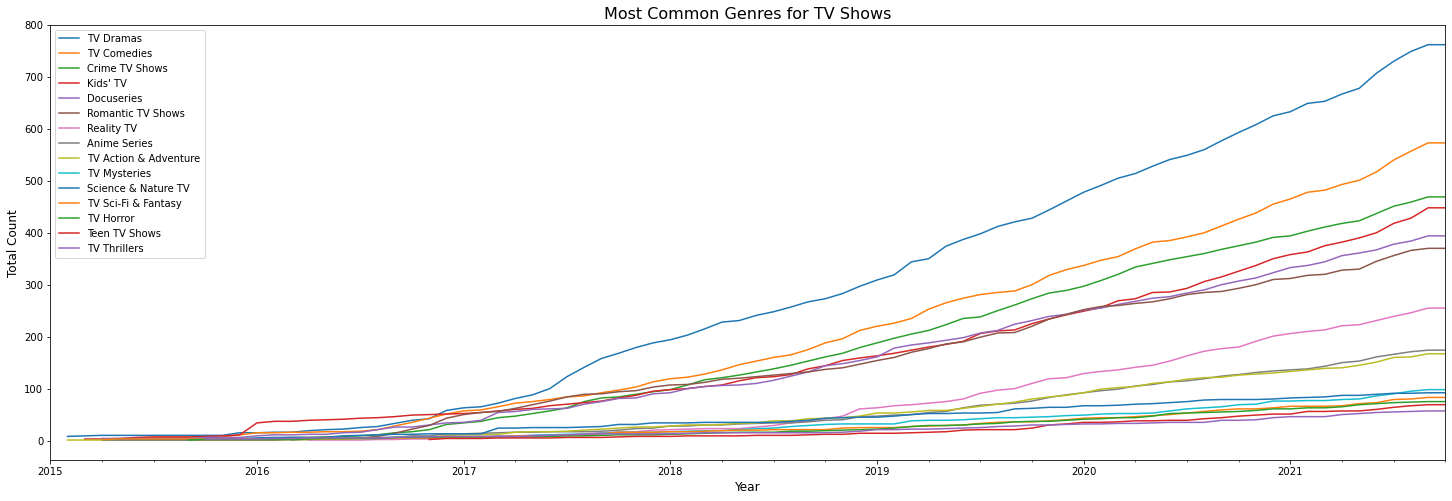

In [23]:
plot_cumulative_count(shows_df, 'genre', most_common_show_genres, 'Most Common Genres for TV Shows')

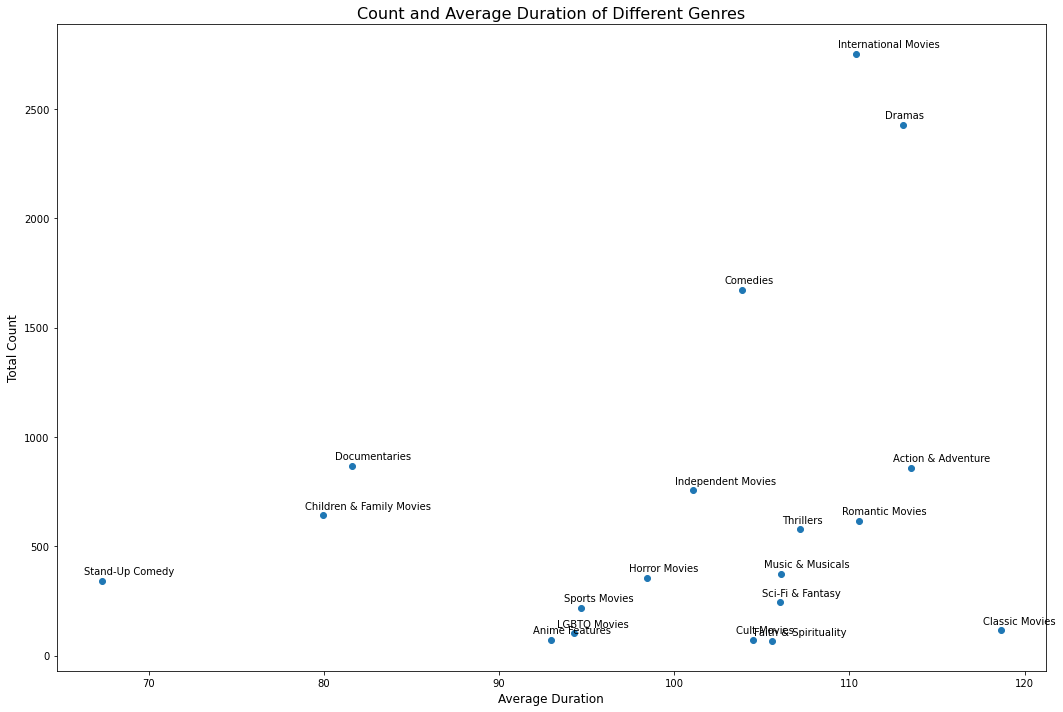

In [26]:
plt.figure(figsize=(15, 10))
plt.scatter(unnest(movies_df, 'genre')[['duration', 'genre']].groupby('genre').mean().drop('Movies').sort_index(), unnest(movies_df, 'genre')[['genre']].value_counts().drop('Movies').sort_index())
for i, txt in enumerate(unnest(movies_df, 'genre')[['duration', 'genre']].groupby('genre').mean().drop('Movies').sort_index().index):
    plt.annotate(txt, (unnest(movies_df, 'genre')[['duration', 'genre']].groupby('genre').mean().drop('Movies').sort_index().values[i]-1, unnest(movies_df, 'genre')[['genre']].value_counts().drop('Movies').sort_index().values[i]+30))
plt.title('Count and Average Duration of Different Genres', fontsize=16)
plt.xlabel('Average Duration', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.tight_layout()
plt.show()